# Vis

In [1]:
from torchhk.vis import *

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels

## Base

### Create Plot

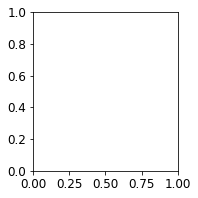

In [3]:
ax = init_plot(ax=None, figsize=(3,3), title="", xlabel="", ylabel="",
               xlim=None, ylim=None, pad_ratio=0, show_axis=True, tight=True)

### Subplots

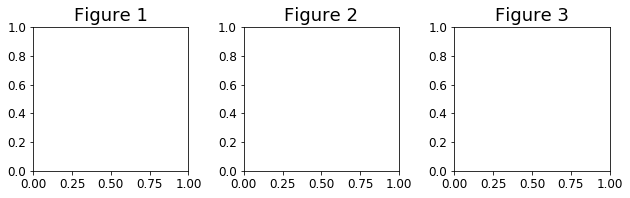

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax1 = init_plot(ax=ax[0], title="Figure 1")
ax2 = init_plot(ax=ax[1], title="Figure 2")
ax3 = init_plot(ax=ax[2], title="Figure 3")

### Twinplot

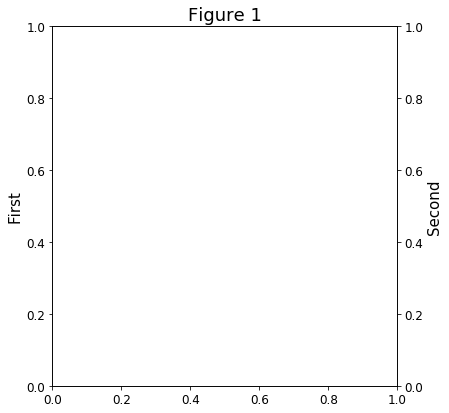

In [5]:
ax1 = init_plot(title="Figure 1", ylabel="First")
ax2 = make_twin(ax1, ylabel="Second")

### Cmap

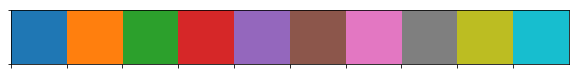

In [6]:
cmap = get_cmap(input='tab10', num=10)
sns.palplot(cmap.colors)

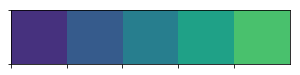

In [7]:
cmap = get_cmap(input='viridis', num=5)
sns.palplot(cmap.colors)

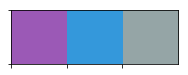

In [8]:
cmap = get_cmap(input=["#9b59b6", "#3498db", "#95a5a6"], num=3)
sns.palplot(cmap.colors)

## Feature

### plot_scatter

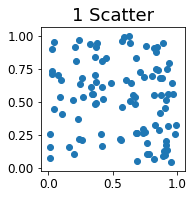

In [9]:
ax = init_plot(figsize=(3,3), title="1 Scatter")
plot_scatter(ax, torch.rand(100, 2))

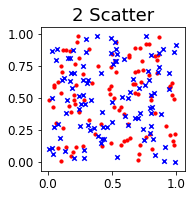

In [10]:
ax = init_plot(figsize=(3,3), title="2 Scatter")
plot_scatter(ax, torch.rand(100, 2), color='red', marker='o', marker_size=10)
plot_scatter(ax, torch.rand(100, 2), color='blue', marker='x', marker_size=20)

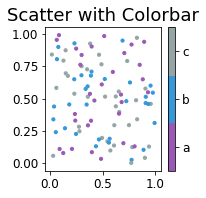

In [11]:
ax = init_plot(figsize=(3,3), title="Scatter with Colorbar")
plot_scatter(ax, torch.rand(100, 2), color=torch.randint(low=0, high=3, size=torch.rand(100).shape),
             marker='o', marker_size=10, cmap=cmap, colorbar=True, colorbar_ticks=['a', 'b', 'c'])

### plot_line

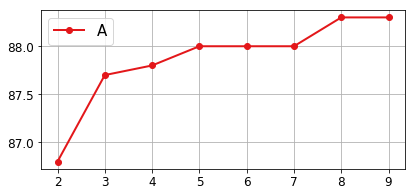

In [12]:
ax = init_plot(figsize=(6, 3), show_grid=True)
x = np.array([2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([86.8, 87.7, 87.8, 88.0, 88.0, 88.0, 88.3, 88.3])

plot_line(ax, x, y, marker='o', markerfacecolor="#e3171a", markersize=6, 
          color="#e3171a", linewidth=2, label="A")
ax.legend(loc="upper left")

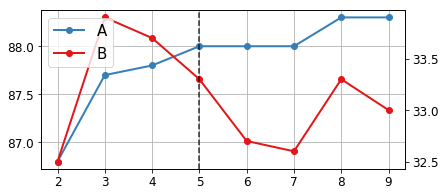

In [13]:
ax = init_plot(figsize=(6, 3), show_grid=True)
ax2 = make_twin(ax=ax)

x = np.array([2, 3, 4, 5, 6, 7, 8, 9])
y1 = np.array([86.8, 87.7, 87.8, 88.0, 88.0, 88.0, 88.3, 88.3])
y2 = np.array([32.5, 33.9, 33.7, 33.3, 32.7, 32.6, 33.3, 33.0])

plot_line(ax, x, y, marker='o', markerfacecolor="#367eb8", markersize=6, 
          color="#367eb8", linewidth=2, label="A")
plot_line(ax2, x, y2, marker='o', markerfacecolor="#e3171a", markersize=6, 
          color="#e3171a", linewidth=2, label="B")
plt.axvline(x=5, color='k', linestyle='--', alpha=0.8)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.tight_layout()
# plt.savefig("./Imgs.pdf")

### plot_dist

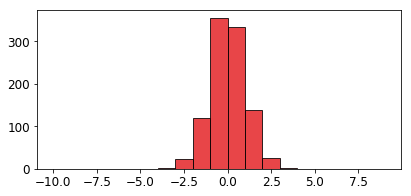

In [14]:
ax = init_plot(figsize=(6, 3))

x = np.random.normal(0, 1, 1000)

plot_hist(ax, x, color="#e3171a", label="A", alpha=0.8,
          bins=np.arange(-10, 10, 1), edgecolor="#000000")

### plot_hist

- Stats
Max : 0.980573
Min : 0.001386
Mean : 0.502454
Median : 0.482120


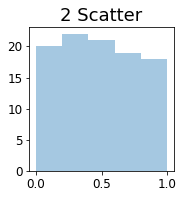

In [15]:
ax = init_plot(figsize=(3,3), title="2 Scatter")
plot_dist(ax, torch.rand(100), bins=[0, 0.2, 0.4, 0.6, 0.8, 1], stat=True, norm_hist=False)

### plot_img

In [16]:
from torchhk.datasets import *

In [17]:
data =Datasets(data_name="CIFAR10")
train_loader, test_loader = data.get_loader(batch_size=12)
train_images, _ = iter(train_loader).next()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000


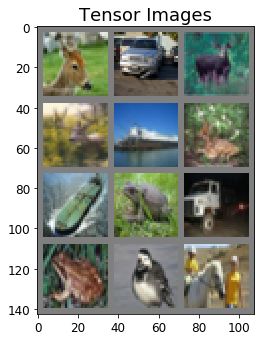

In [18]:
ax = init_plot(figsize=(5, 5), title="Tensor Images")
plot_img(ax, train_images, ncols=3, padding=3, pad_value=0.5)

### plot_pca

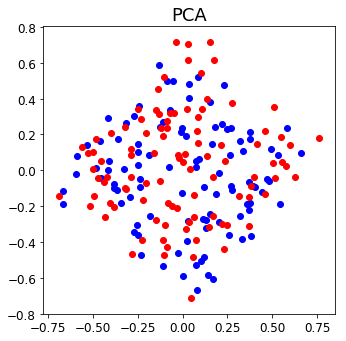

In [19]:
ax = init_plot(figsize=(5, 5), title="PCA")
plot_pca(ax, [torch.rand(100, 3), torch.rand(100, 3)], colors=['blue', 'red'])

### plot_tsne

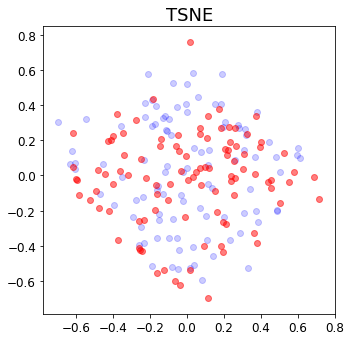

In [20]:
ax = init_plot(figsize=(5, 5), title="TSNE")
plot_pca(ax, [torch.rand(100, 3), torch.rand(100, 3)], colors=['blue', 'red'], alphas=[0.2, 0.5])

## Model

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [22]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1,32,5),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.Conv2d(32,64,5),
            nn.MaxPool2d(2,2),
            nn.ReLU(),
            nn.Flatten()
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64*4*4, 100),
            nn.ReLU(),
            nn.Linear(100, 2),
            nn.ReLU(),
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )       
        
    def forward(self,x):
        out = self.conv_layer(x)
        out = self.fc_layer(out)

        return out

In [23]:
model = CNN().cuda()

In [24]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=5e-4)
num_epochs = 2

In [25]:
data = Datasets(data_name="MNIST")
train_loader, test_loader = data.get_loader(batch_size=128)

Data Loaded!
Train Data Length : 60000
Test Data Length : 10000


In [26]:
for epoch in range(num_epochs):
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.cuda()
        Y = batch_labels.cuda()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_loader), cost.item()))

Epoch [1/2], lter [200/468], Loss: 0.3718
Epoch [1/2], lter [400/468], Loss: 0.5179
Epoch [2/2], lter [200/468], Loss: 0.9221
Epoch [2/2], lter [400/468], Loss: 0.7831


In [27]:
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 61.150000 %


### plot_logit_dist

- Stats
Max : 43.055912
Min : -34.867428
Mean : 0.002791
Median : -0.191598


C:\Users\slcf\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



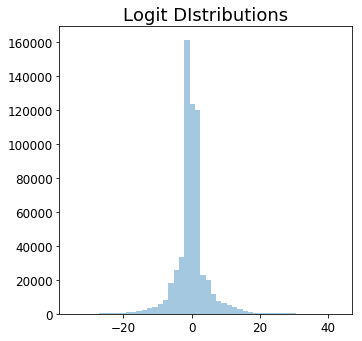

In [28]:
ax = init_plot(figsize=(5, 5), title="Logit DIstributions")
plot_logit_dist(ax, model, train_loader)

### plot_grad_dist

- Stats
Max : 0.511684
Min : -0.437487
Mean : -0.000006
Median : 0.000000


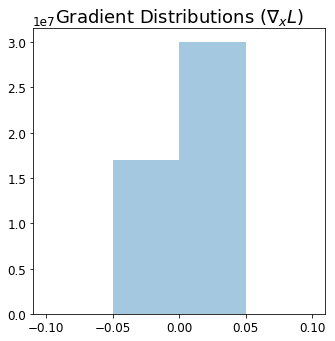

In [29]:
ax = init_plot(figsize=(5, 5), title=r"Gradient Distributions ($\nabla_x L$)")
plot_grad_dist(ax, model, train_loader, loss=nn.CrossEntropyLoss(), bins=[-0.1, -0.05, 0, 0.05, 0.1])

### plot_decision_boundary

In [30]:
class latent() :
    def __init__(self, model) :
        self.model = model
        
    def parameters(self) :
        return self.model.fc_layer[4:].parameters()
    
    def __call__(self, x) :
        out = self.model.fc_layer[4:](x)
        _, predicted = torch.max(out, 1)
        return predicted
        
latent_model = latent(model)

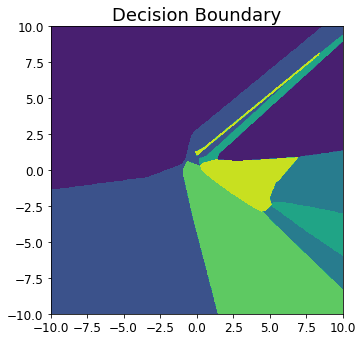

In [31]:
ax = init_plot(figsize=(5, 5), title="Decision Boundary")
plot_decision_boundary(ax, latent_model, xrange=(-10, 10), yrange=(-10, 10))

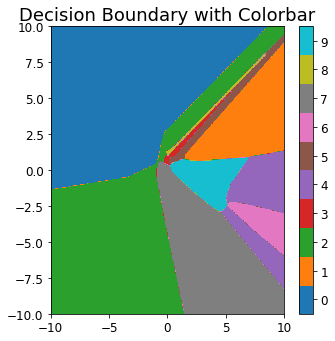

In [32]:
cmap = get_cmap('tab10', 10)

ax = init_plot(figsize=(5, 5), title="Decision Boundary with Colorbar")
plot_decision_boundary(ax, latent_model, xrange=(-10, 10), yrange=(-10, 10),
                       cmap=cmap, colorbar=True)#, colorbar_ticks=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

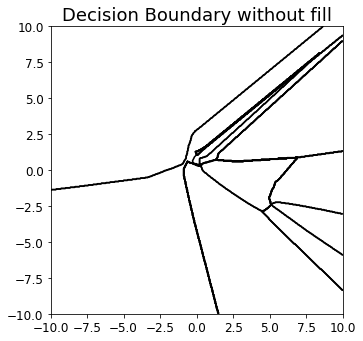

In [33]:
cmap = get_cmap(['#000000']*10)
ax = init_plot(figsize=(5, 5), title="Decision Boundary without fill")
plot_decision_boundary(ax, latent_model, xrange=(-10, 10), yrange=(-10, 10), as_line=True, cmap=cmap)

### plot_weight

In [34]:
def filter(name) :
    isWeight = "weight" in name
    return isWeight

- Stats
Max : 2.941182
Min : -5.076963
Mean : -0.018857
Median : -0.008295


C:\Users\slcf\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



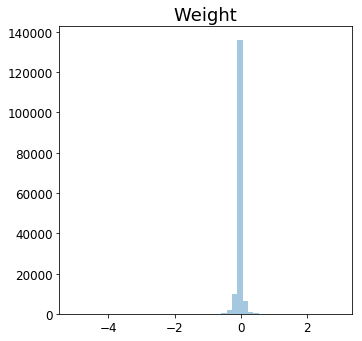

In [35]:
ax = init_plot(figsize=(5, 5), title="Weight")
plot_weight(ax, model, filter=filter)

### plot_individual_weight

In [36]:
def filter(name) :
    isWeight = "weight" in name
    isConv = "conv" in name
    return isWeight*isConv

C:\Users\slcf\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



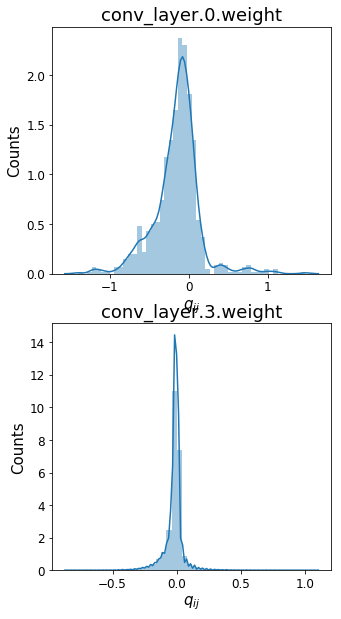

In [37]:
plot_individual_weight(model, ncols=1, filter=filter)

### plot_perturb

In [38]:
images, labels = iter(test_loader).next()

In [45]:
j=1
a = 4*torch.rand_like(images[0])
b = 4*torch.rand_like(images[0])

rx, ry, zs, colors = cal_perturb(model=model,
                                 image=images[j], label=labels[j],
                                 vec_x=b, vec_y=a,
                                 range_x=(0,1), range_y=(0,1), 
                                 grid_size=30,
                                 loss=nn.CrossEntropyLoss(reduction='none'),
                                )

In [46]:
plot_perturb_plotly(rx, ry, zs, colors,
                    z_by_loss=True, color_by_loss=False, 
                    title='Loss Visualization', width=600, height=600,
                    x_ratio=1, y_ratio=1, z_ratio=0.8,
                   )

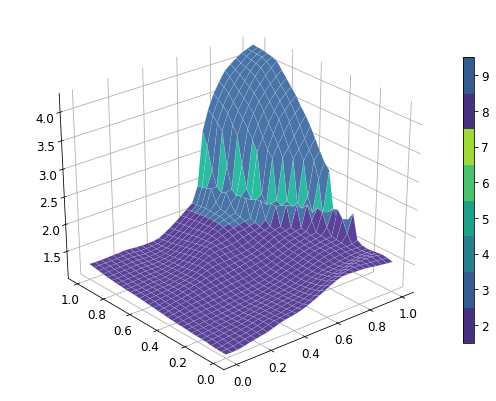

In [47]:
plot_perturb_plt(rx, ry, zs, colors,
                 z_by_loss=True, color_by_loss=False, color='viridis',
                 min_value=None, max_value=None,
                 title=None, width=8, height=7, linewidth = 0.1,
                 x_ratio=1, y_ratio=1, z_ratio=1,
                 edge_color='#f2fafb', colorbar_yticklabels=None,
                 pane_color=(1.0, 1.0, 1.0, 0.0),
                 tick_pad_x=0, tick_pad_y=0, tick_pad_z=1.5,
                 xticks=None, yticks=None, zticks=None,
                 xlabel=None, ylabel=None, zlabel=None,
                 view_azimuth=230, view_altitude=30,
                 light_azimuth=315, light_altitude=45, light_exag=0)

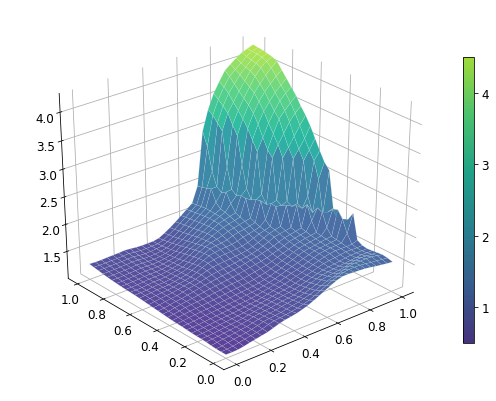

In [48]:
plot_perturb_plt(rx, ry, zs, colors,
                 z_by_loss=True, color_by_loss=True, color='viridis',
                 min_value=None, max_value=None,
                 title=None, width=8, height=7, linewidth = 0.1,
                 x_ratio=1, y_ratio=1, z_ratio=1,
                 edge_color='#f2fafb', colorbar_yticklabels=None,
                 pane_color=(1.0, 1.0, 1.0, 0.0),
                 tick_pad_x=0, tick_pad_y=0, tick_pad_z=1.5,
                 xticks=None, yticks=None, zticks=None,
                 xlabel=None, ylabel=None, zlabel=None,
                 view_azimuth=230, view_altitude=30,
                 light_azimuth=315, light_altitude=45, light_exag=0)